In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


In [ ]:
data = pd.read_csv('hotel_clean_meanNAN.csv')

In [ ]:
label_encoders = {}

for column in data.select_dtypes(include=['object']).columns:
    label_encoder = LabelEncoder()
    data[column] = label_encoder.fit_transform(data[column])
    label_encoders[column] = label_encoder



In [ ]:
data

,Unnamed: 0,hotelname,rating,reviews,star rating,location,price,tax
0,0,267,5.0,322.0,4.0,35,41,1
1,1,185,4.5,1142.0,3.0,35,20,31
2,2,560,5.0,2469.0,5.0,2,93,21
3,3,807,4.5,4361.0,4.0,35,59,6
4,4,560,5.0,2469.0,5.0,2,94,21
...,...,...,...,...,...,...,...,...
2442,2442,484,4.5,520.0,3.0,8,26,0
2443,2443,959,4.5,520.0,4.0,8,29,0
2444,2444,810,4.5,520.0,4.0,8,70,0
2445,2445,167,4.5,520.0,2.0,53,19,0


In [ ]:
X = data.drop('price', axis=1)
y = data['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 1. DecisionTree

In [ ]:
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

In [ ]:
xmin= min(y_test.min(), y_pred.min() )-1
xmax= max(y_test.max(), y_pred.max() )+1

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean absolute Error: {mae}')

Mean absolute Error: 16.57551020408163


In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1461.5836734693878


In [ ]:
from math import sqrt
rmse = sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 38.23066404693211


In [ ]:
r_squared = r2_score(y_test, y_pred)
print(r_squared)

0.25812000979123806


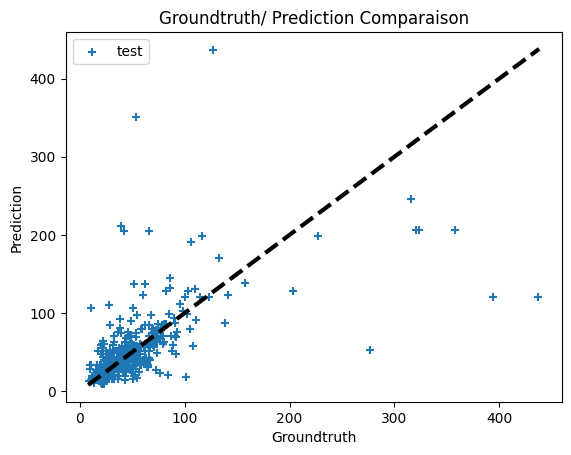

In [ ]:
fig = plt.figure(1)
plt.scatter(y_test,y_pred, marker='+', label='test')
plt.plot([xmin,xmax], [xmin,xmax], lw=3, color='k', ls='--') ## droite separatrice d'equation x2=x1

plt.xlabel('Groundtruth')
plt.ylabel('Prediction')
plt.title('Groundtruth/ Prediction Comparaison')
plt.legend()
plt.savefig('LR.png')

# 2. RandomForest



In [ ]:
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

In [ ]:
xmin= min(y_test.min(), y_pred.min() )-1
xmax= max(y_test.max(), y_pred.max() )+1

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean absolute Error: {mae}')

Mean absolute Error: 13.357448979591837


In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 563.5928291836734


In [ ]:
from math import sqrt
rmse = sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 23.740110134194268


In [ ]:
r_squared = r2_score(y_test, y_pred)
print(r_squared)

0.7139279466607497


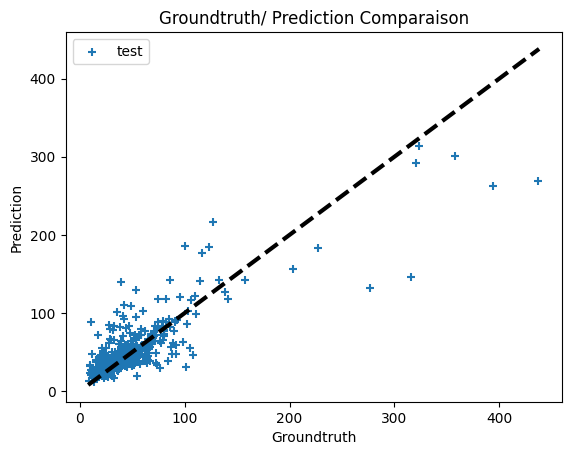

In [ ]:
fig = plt.figure(1)
plt.scatter(y_test,y_pred, marker='+', label='test')
plt.plot([xmin,xmax], [xmin,xmax], lw=3, color='k', ls='--') ## droite separatrice d'equation x2=x1

plt.xlabel('Groundtruth')
plt.ylabel('Prediction')
plt.title('Groundtruth/ Prediction Comparaison')
plt.legend()
plt.savefig('LR.png')

# 3.GradientBoosting

In [ ]:
gadient_boosting = GradientBoostingRegressor(random_state=42)
gadient_boosting.fit(X_train, y_train)
y_pred = gadient_boosting.predict(X_test)

In [ ]:
xmin= min(y_test.min(), y_pred.min() )-1
xmax= max(y_test.max(), y_pred.max() )+1

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean absolute Error: {mae}')

Mean absolute Error: 15.377394710986474


In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 707.7511521027685


In [ ]:
from math import sqrt
rmse = sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 26.603592841997273


In [ ]:
r_squared = r2_score(y_test, y_pred)
print(r_squared)

0.640755142984129


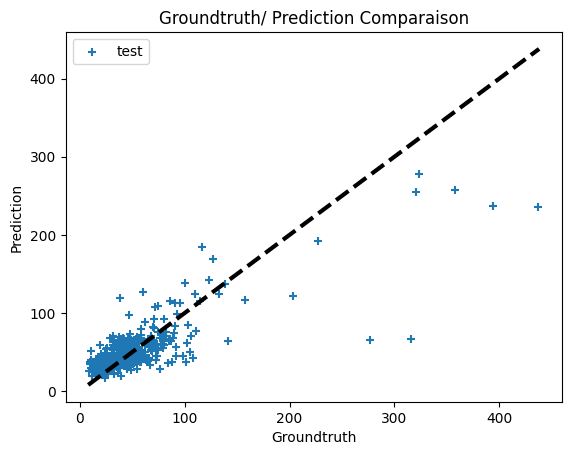

In [ ]:
fig = plt.figure(1)
plt.scatter(y_test,y_pred, marker='+', label='test')
plt.plot([xmin,xmax], [xmin,xmax], lw=3, color='k', ls='--') ## droite separatrice d'equation x2=x1

plt.xlabel('Groundtruth')
plt.ylabel('Prediction')
plt.title('Groundtruth/ Prediction Comparaison')
plt.legend()
plt.savefig('LR.png')